<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
install.packages("skimr")
install.packages("psych")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [98]:
library(tidyverse)
require(readxl)
library(skimr)
library(psych)

In [99]:
install.packages("tibble")
library(tibble)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [124]:
meta <- read_xlsx('/content/metadata.xlsx', sheet =1)
meta <- rename_with(meta, make.names)
meta <- select(meta, -Name, -Sucrose)
meta <- mutate(meta,Patient.number = as.factor(Patient.number),
              Vial.number = as.factor(Vial.number),
              Group = as.factor(Group),
              Sm = as.factor(Sm),
              Dm = as.factor(Dm),
              LVH = as.factor(LVH),
              IHD = as.factor(IHD),
              MI = as.factor(MI),
              Str = as.factor(Str),
              A_C = as.factor(A_C),
              A_H = as.factor(A_H),
              A_D = as.factor(A_D))



In [125]:
descriptive <- read_xlsx('/content/metadata.xlsx', sheet = 2)
descriptive <- rename(descriptive, 'Variable'='...1', 'Description' = '...2')
descriptive <- drop_na(descriptive)

In [102]:
descriptive

Variable,Description
<chr>,<chr>
Ht,growth
Wt,the weight
BMI,body mass index
Sys,Systolic blood pressure
Dia,Diastolic blood pressure
PR,pulse
Sm,smoking
Dm,diabetes
HT,hypertension


In [126]:
attr(meta$Ht, "label") <- "Growth"
attr(meta$Wt, "label") <- "Weight"
attr(meta$BMI, "label") <- "Body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "Pulse"
attr(meta$Sm, "label") <- "Smoking"
attr(meta$Dm, "label") <- "Diabetes"
attr(meta$HT, "label") <- "Hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "Medical history of infarction"
attr(meta$Str, "label") <- "Medical history of stroke"
attr(meta$A_C, "label") <- "Family history of CAD"
attr(meta$A_H, "label") <- "Family history hypertension"
attr(meta$A_D, "label") <- "Family history diabetes"
attr(meta$Choi...25, "label") <- "Cholesterol"
attr(meta$Choi...29, "label") <- "Cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"



In [127]:
str(meta)

tibble [38 × 47] (S3: tbl_df/tbl/data.frame)
 $ Vial.number     : Factor w/ 38 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Patient.number  : Factor w/ 32 levels "25","26","27",..: 19 20 21 22 23 24 25 26 27 28 ...
 $ Group           : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 2 2 1 2 ...
 $ Date            : POSIXct[1:38], format: "2022-03-26" "2023-12-23" ...
 $ Age             : num [1:38] 63 47 57 72 57 79 61 70 50 53 ...
 $ Plasma.volume   : num [1:38] 6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht              : num [1:38] 163 179 164 160 180 160 164 162 150 172 ...
  ..- attr(*, "label")= chr "Growth"
 $ Wt              : num [1:38] 84 111 80 58.8 71 64 67 61 79 88.2 ...
  ..- attr(*, "label")= chr "Weight"
 $ BMI             : num [1:38] 31.6 34.6 29.7 23 21.9 ...
  ..- attr(*, "label")= chr "Body mass index"
 $ Sys             : num [1:38] 125 125 132 130 135 110 124 135 142 120 ...
  ..- attr(*, "label")= chr "Systolic blood pressure"
 $ Dia             : num [1:38] 76 82 

In [128]:
meta <- meta %>%
  mutate(Age_interval = cut(Age, breaks = c(0, 50, 60, 70, 80, Inf), labels = c("<50", "50-60", "60-70", "70-80", ">80")))

In [106]:
#meta <- meta %>% выдает много NAN так и не поняла в чем проблема
  ##mutate(Ht_interval = factor(case_when(
    #Ht < 150 ~ "<150",
    #Ht >= 150 & Ht < 160 ~ "150-160",
    #Ht >= 160 & Ht < 170 ~ "160-170",
    #Ht >= 170 & Ht < 180 ~ "170-180",
    #Ht >= 180 ~ ">180"
  #)))

In [129]:
meta <- meta %>%
  mutate(PR_interval = cut(PR, breaks = c(60, 80, 90, Inf), labels = c("<60", "60-80", ">90")))

In [130]:
meta <- meta %>%
  mutate(BMI_weight = cut(BMI, breaks = c(0, 20, 25, 30, 35, 40, Inf), labels = c("underweight", "normal","overweight", "obese_1", "obese_2", "obese_3")))

In [131]:
summary(meta)

  Vial.number Patient.number Group       Date                       
 1      : 1   37     : 2     0:14   Min.   :2022-01-01 00:00:00.00  
 2      : 1   38     : 2     1:24   1st Qu.:2022-05-16 12:00:00.00  
 3      : 1   39     : 2            Median :2022-08-14 00:00:00.00  
 4      : 1   40     : 2            Mean   :2022-10-18 10:06:18.95  
 5      : 1   42     : 2            3rd Qu.:2023-03-14 00:00:00.00  
 6      : 1   43     : 2            Max.   :2023-12-23 00:00:00.00  
 (Other):32   (Other):26                                            
      Age        Plasma.volume          Ht              Wt        
 Min.   :47.00   Min.   : 5.000   Min.   :150.0   Min.   : 56.50  
 1st Qu.:60.25   1st Qu.: 6.500   1st Qu.:161.0   1st Qu.: 63.25  
 Median :65.00   Median :10.250   Median :165.0   Median : 72.50  
 Mean   :65.58   Mean   : 9.453   Mean   :165.0   Mean   : 74.86  
 3rd Qu.:70.00   3rd Qu.:11.875   3rd Qu.:168.8   3rd Qu.: 83.50  
 Max.   :83.00   Max.   :13.000   Max.   :180.

In [132]:
num_desc_stat <- skimr::skim(select(meta, where(is.numeric)))

In [133]:
num_desc_stat #сложно судить по этим гистограммам, но видно, что возраст стремится к нормальному распределению

── Data Summary ────────────────────────
                           Values                      
Name                       select(meta, where(is.num...
Number of rows             38                          
Number of columns          33                          
_______________________                                
Column type frequency:                                 
  numeric                  33                          
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable    n_missing complete_rate    mean     sd      p0     p25
 1 Age                      0         1      65.6    8.67   47      60.2  
 2 Plasma.volume            0         1       9.45   2.88    5       6.5  
 3 Ht                       0         1     165      6.31  150     161    
 4 Wt                       0         1      74.9   14.3    56.5    63.2 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


In [134]:
factor_desc_stat <- skimr::skim(select(meta, where(is.factor)))

In [135]:
factor_desc_stat

── Data Summary ────────────────────────
                           Values                      
Name                       select(meta, where(is.fac...
Number of rows             38                          
Number of columns          15                          
_______________________                                
Column type frequency:                                 
  factor                   15                          
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable  n_missing complete_rate ordered n_unique
 1 Vial.number            0         1     FALSE         38
 2 Patient.number         0         1     FALSE         32
 3 Group                  0         1     FALSE          2
 4 Sm                     0         1     FALSE          2
 5 Dm                     0         1     FALSE          2
 6 LVH             

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 7' in coercion to 'logical(1)'


In [136]:
grouped_Plaque <- meta %>%
  group_by(Plaque) %>%
  select(where(is.numeric)) %>%
  summarise(psych::describe(Choi...25))

In [137]:
grouped_Plaque
# По 4 стадия уровня Бляшки посмотрим как распреден Холестерин. Что видно сразу, так то что данных недосточно, особенно в 1,4 группе для того чтобы судить о характере распределения
# Нормальное распеделение не наблюдается, в 0 и 1 группе скошенно вправо, в 1 и 3 - влево
# экцесс меньше 0 - кривая распределения имеет плоская, несимметричная


Plaque,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,3,254.3333,57.274194,234,254.3333,35.5824,210,319,109,0.3102719,-2.3333333,33.067271
1,1,15,232.6667,43.120540,240,231.3077,45.9606,164,319,155,0.1146247,-0.9462686,11.133676
2,1,17,252.1176,36.808427,263,252.4667,26.6868,177,322,145,-0.2947848,-0.7430459,8.927355
3,1,3,201.3333,5.033223,202,201.3333,5.9304,196,206,10,-0.1301295,-2.3333333,2.905933


In [138]:
grouped_Plaque_Tgi <- meta %>%
  group_by(Plaque) %>%
  select(where(is.numeric)) %>%
  summarise(psych::describe(Tgi...26))

In [139]:
grouped_Plaque_Tgi
# ТГ и степень выражености бляшки тоже не наблюдается нормального распределения, скошенно вправо, кроме 3 ст
# Здесь распределение островершиное, тк экцесс больше 0


Plaque,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,3,92.33333,72.45918,51,92.33333,1.4826,50,176,126,0.3848177,-2.3333333,41.83433
1,1,15,124.13333,68.38950,101,115.61538,41.5128,52,307,255,1.2876898,0.8636934,17.65809
2,1,17,125.70588,57.97172,117,119.00000,22.2390,35,317,282,1.8225745,4.4257128,14.06021
3,1,3,137.66667,34.26855,146,137.66667,31.1346,100,167,67,-0.2287970,-2.3333333,19.78496


In [140]:
grouped_Plaque_BMI_weight <- meta %>%
  group_by(BMI_weight, Plaque) %>%
  select(where(is.numeric)) %>%
  summarise(psych::describe(Choi...25))

Adding missing grouping variables: `BMI_weight`
`summarise()` has grouped output by 'BMI_weight'. You can override using the
`.groups` argument.


In [141]:
grouped_Plaque_BMI_weight
# было бы интересно посмотреть вес и уровень развития бляшки по уровню холестирина, но очень мало данных

BMI_weight,Plaque,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
normal,0,1,2,222.00,16.970563,222.0,222.00,17.7912,210,234,24,0.000000e+00,-2.7500000,12.000000
normal,1,1,8,221.50,41.795420,224.0,221.50,54.1149,164,280,116,2.898379e-02,-1.7288687,14.776912
normal,2,1,5,240.80,44.918816,263.0,240.80,34.0998,177,286,109,-3.625457e-01,-1.9154499,20.088305
normal,3,1,1,196.00,NA,196.0,196.00,0.0000,196,196,0,NA,NA,NA
overweight,1,1,3,245.00,7.937254,242.0,245.00,4.4478,239,254,15,3.239695e-01,-2.3333333,4.582576
overweight,2,1,8,260.25,35.644074,263.0,260.25,17.0499,202,322,120,-6.210557e-06,-0.8564469,12.602083
overweight,3,1,1,206.00,NA,206.0,206.00,0.0000,206,206,0,NA,NA,NA
obese_1,0,1,1,319.00,NA,319.0,319.00,0.0000,319,319,0,NA,NA,NA
obese_1,1,1,2,243.00,39.597980,243.0,243.00,41.5128,215,271,56,0.000000e+00,-2.7500000,28.000000


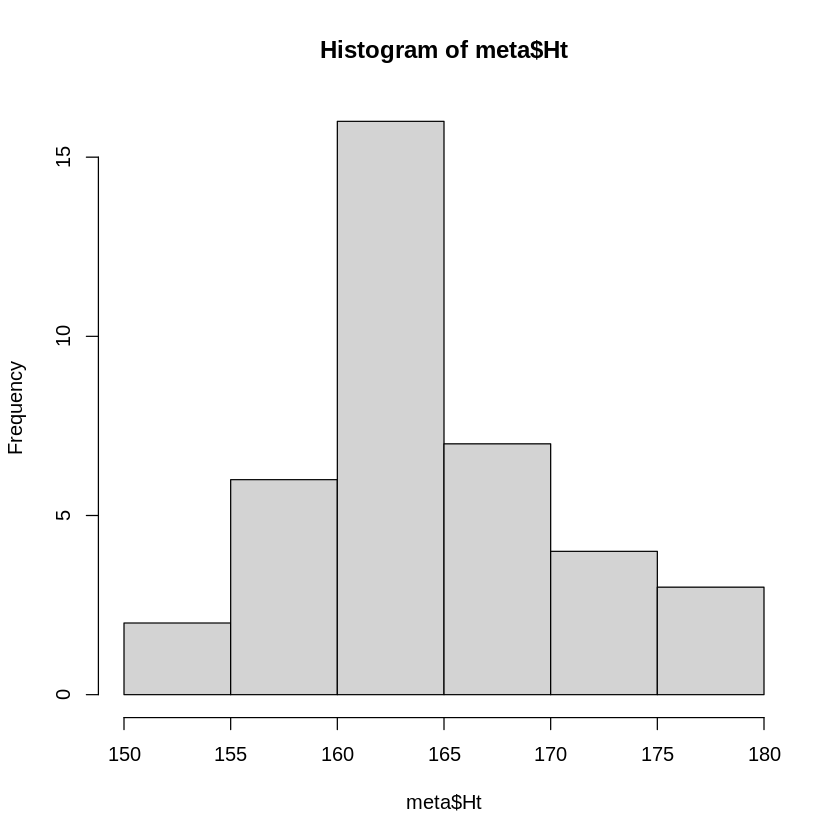

In [142]:
hist(meta$Ht)
# Посмотрим распределение по росту. Распрредение скошенно влево, его легко принять за нормальное,
# но смущают тежелые концы, особенно справа. Это похоже на t-распределение Стьюдента

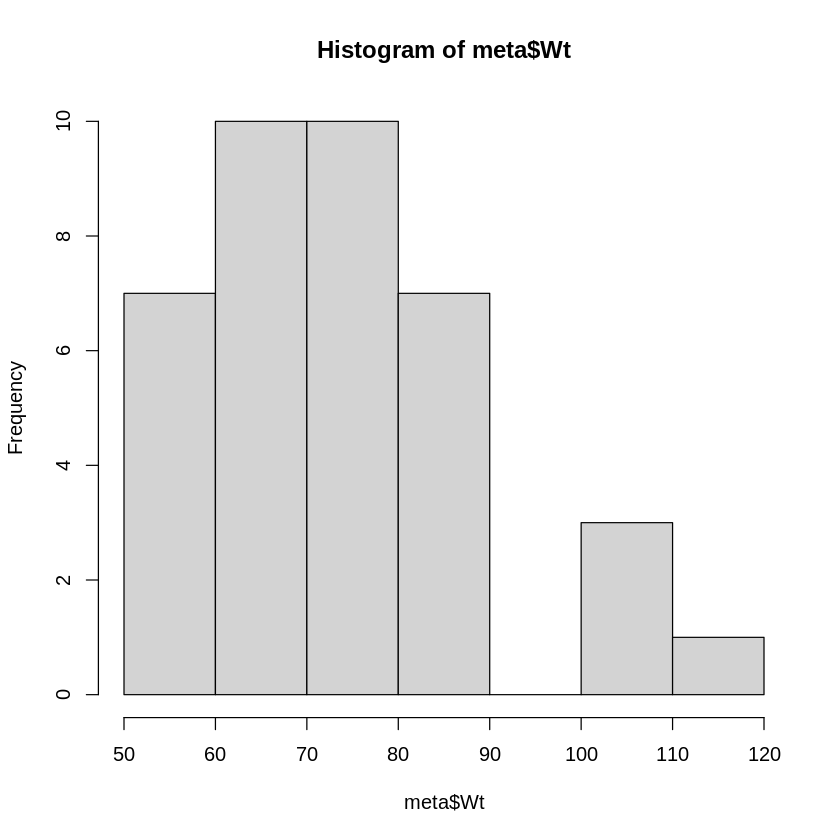

In [148]:
hist(meta$Wt)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


NULL

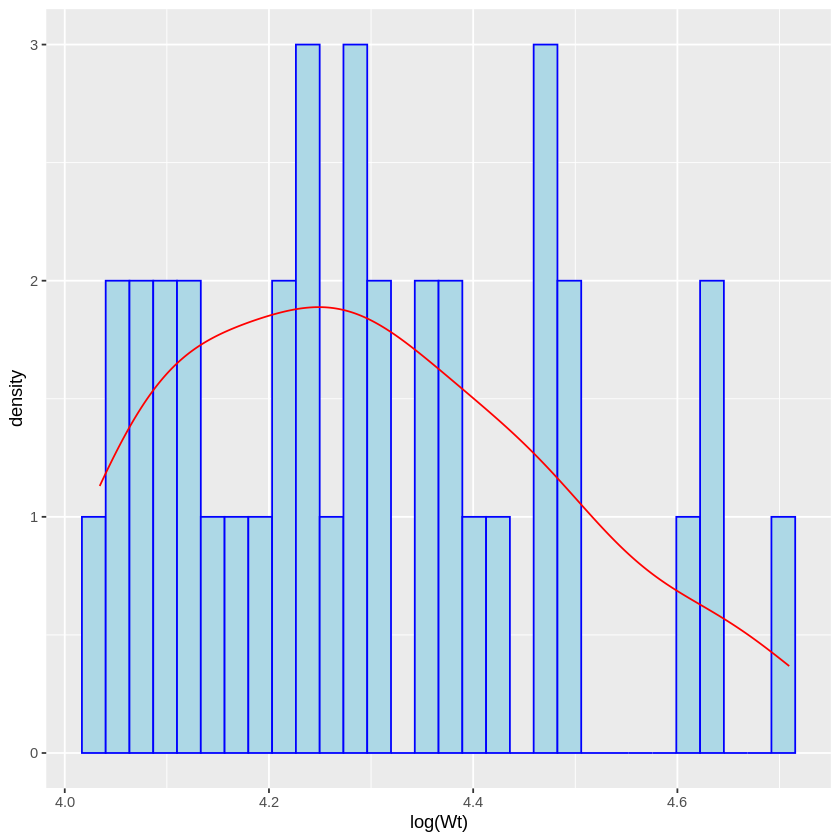

In [152]:
ggplot(meta, aes(log(Wt))) +
  geom_histogram(color = "blue", fill = "lightblue") + geom_density(color = "red")
  ggtitle("Distribution of Weight") +
  scale_x_log10(name = "log10_Weight") +
  scale_y_continuous(name = "Frequency")


# Здесь видно, что распределение смещено влево, концы тяжелые. Возможно t-распределение Стьюдента

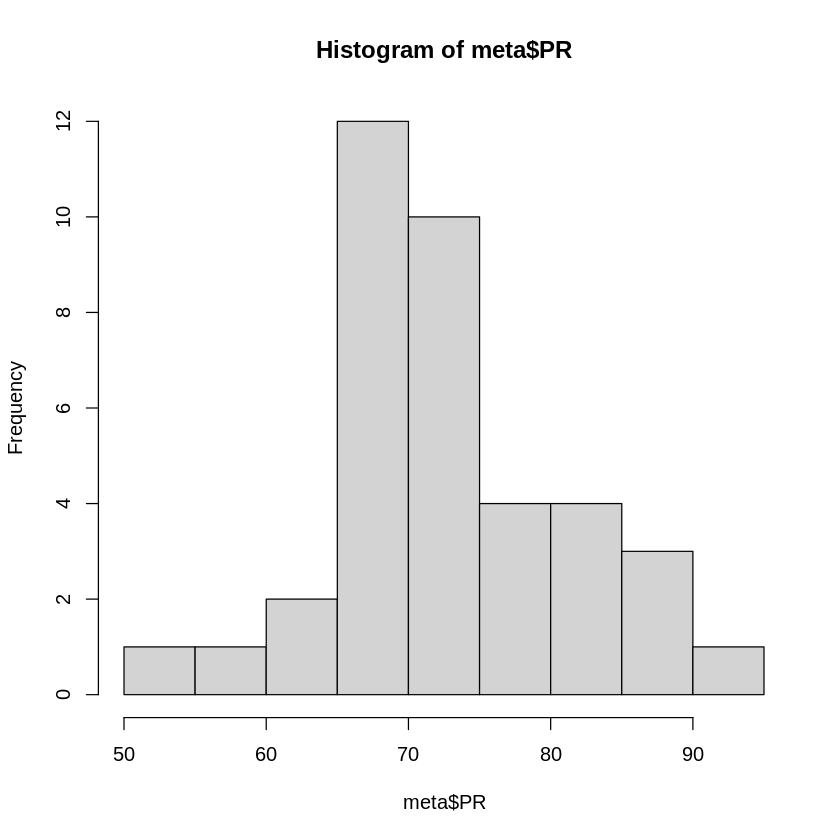

In [154]:
hist(meta$PR)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


NULL

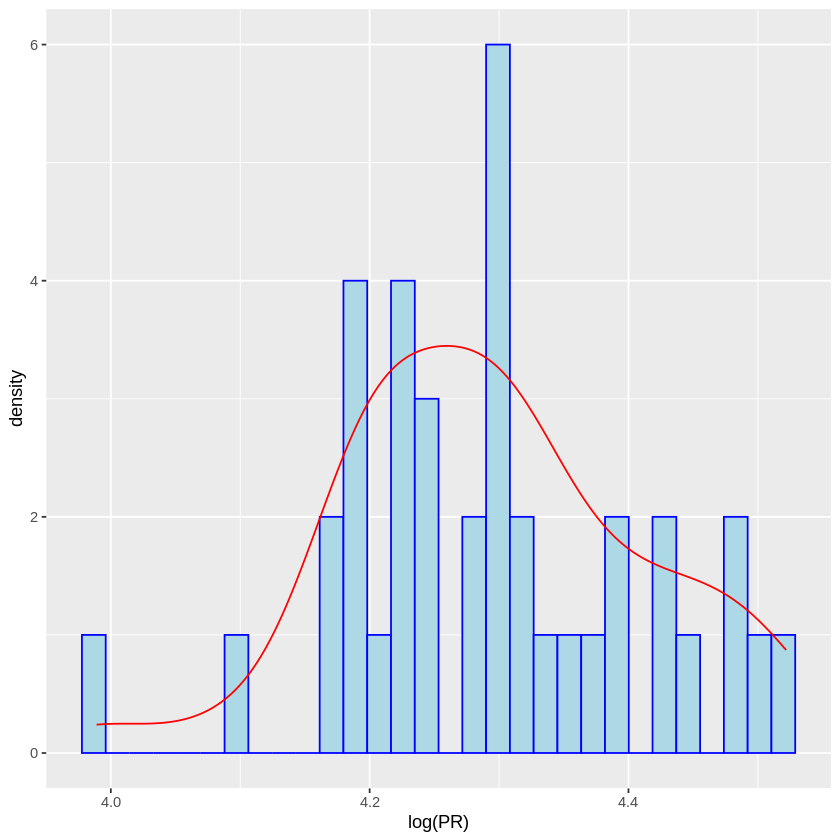

In [155]:
ggplot(meta, aes(log(PR))) +
  geom_histogram(color = "blue", fill = "lightblue") + geom_density(color = "red")
  ggtitle("Distribution of Pulse") +
  scale_x_log10(name = "log10_Pulse") +
  scale_y_continuous(name = "Frequency")

# Здесь тоже  t-распределение Стьюдента, скошено вправо

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


NULL

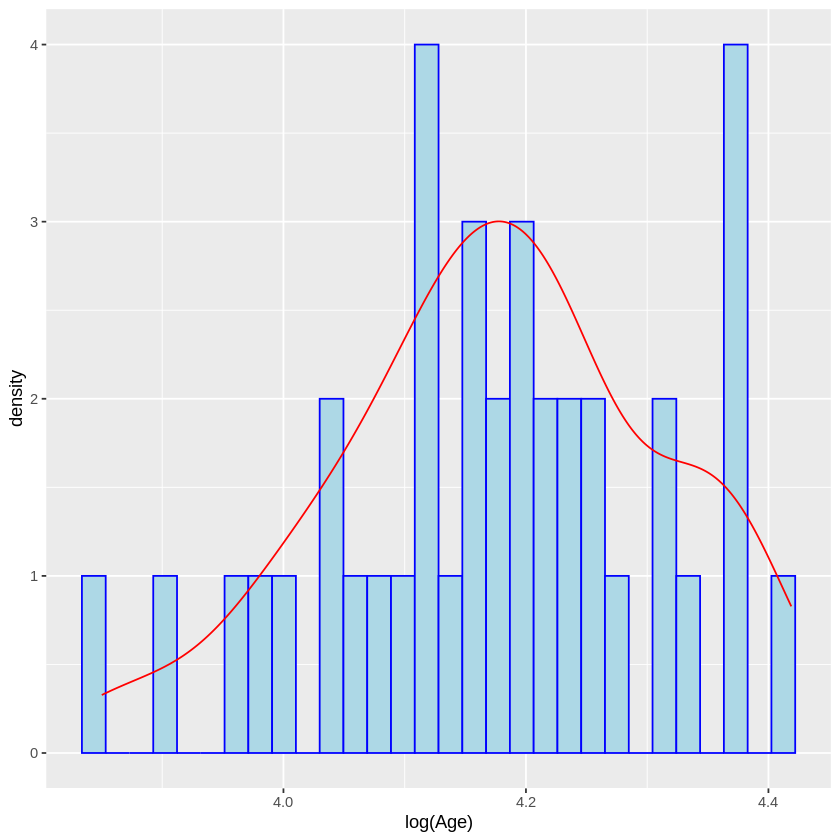

In [156]:
ggplot(meta, aes(log(Age))) +
  geom_histogram(color = "blue", fill = "lightblue") + geom_density(color = "red")
  ggtitle("Distribution of Age") +
  scale_x_log10(name = "log10_Age") +
  scale_y_continuous(name = "Frequency")

# Здесь тоже  t-распределение Стьюдента, скошено вправо

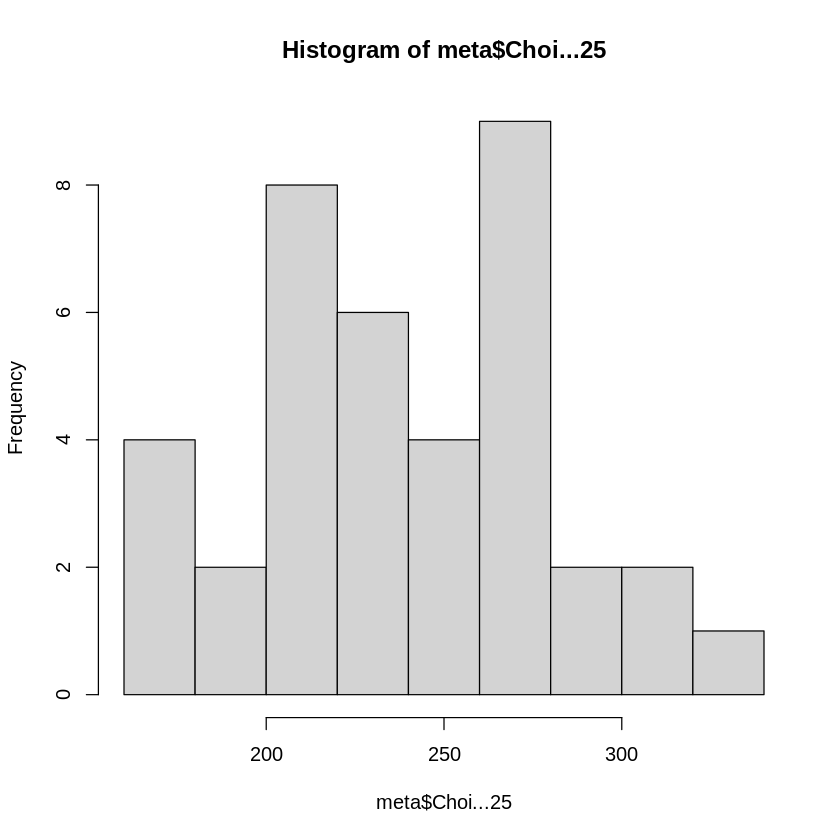

In [158]:
hist(meta$Choi...25)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


NULL

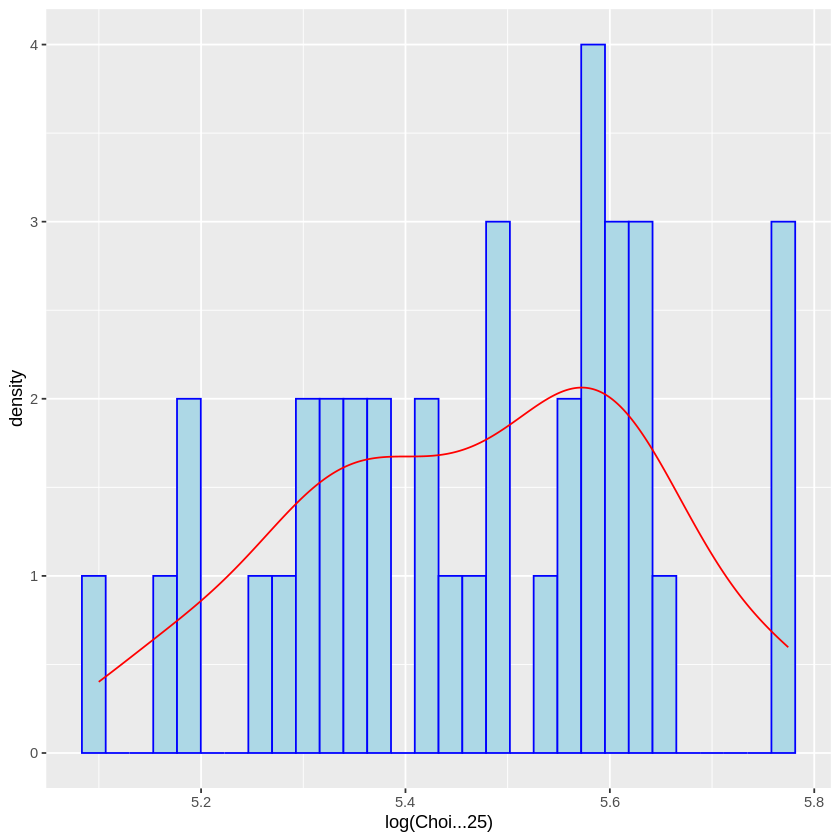

In [157]:
ggplot(meta, aes(log(Choi...25  ))) +
  geom_histogram(color = "blue", fill = "lightblue") + geom_density(color = "red")
  ggtitle("Distribution of cholesterol") +
  scale_x_log10(name = "log10_cholesterol") +
  scale_y_continuous(name = "Frequency")

#как будто стремится к бимодальному, но не дотягивает

In [159]:
meta <- mutate(meta,
              Sm = as.numeric(Sm),
              Dm = as.numeric(Dm),
              Str = as.numeric(Str)
              )


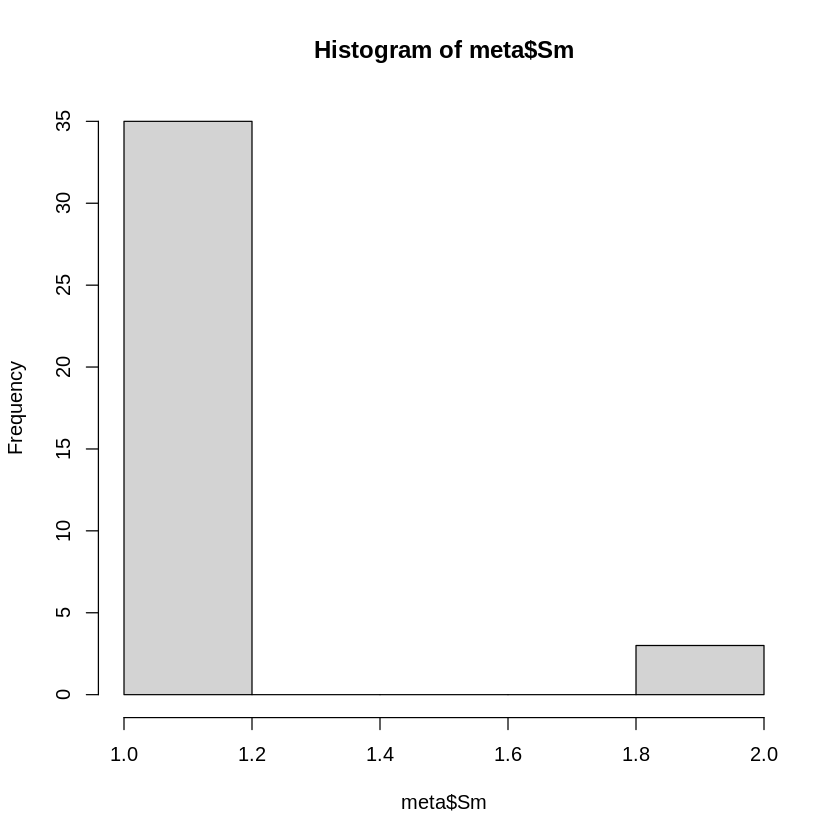

In [160]:
hist(meta$Sm)
# Распределение Бернулли, два взаимоислючающие исходы


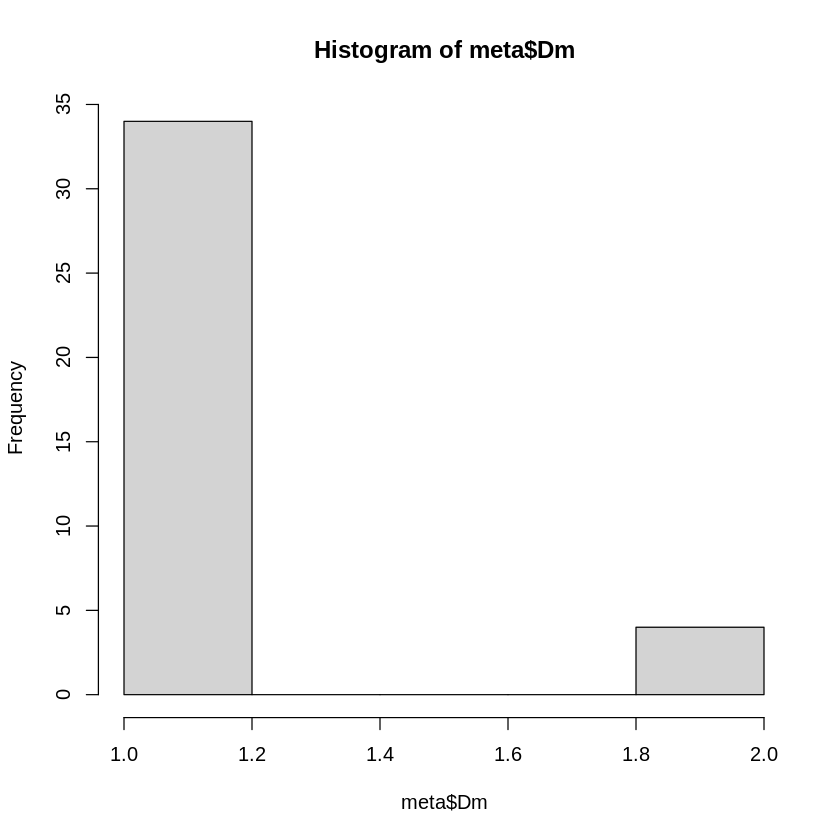

In [161]:
hist(meta$Dm)
# Распределение Бернулли, есть диабет или нет

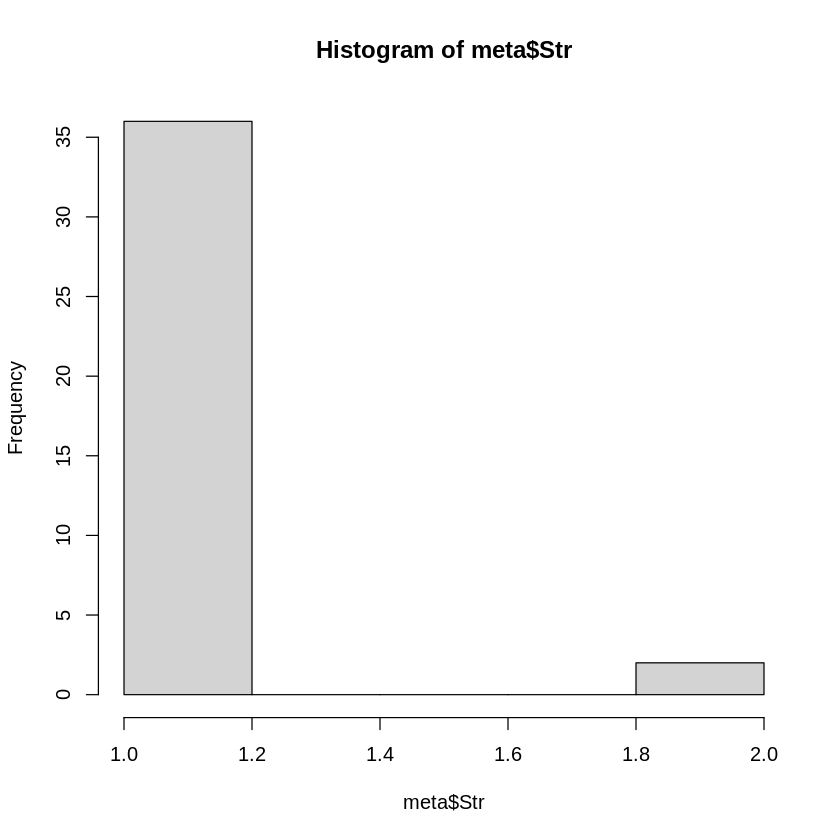

In [163]:
hist(meta$Str)